In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils

In [3]:
#modeldict 

In [4]:
class model_result():
    
    def __init__(self, prefix, aetype):
        self.sigloss = np.load(prefix+'_sigloss.npy')
        self.bkgloss = np.load(prefix+'_bkgloss.npy')
        self.aetype = aetype
        
    def get_tpr_fpr(self):
        bins = np.linspace(0,50,1001)
        tpr = []
        fpr = []
        for cut in bins:
            if self.aetype == 'sig':
                tpr.append(np.where(self.sigloss<cut)[0].shape[0]/len(self.sigloss))
                fpr.append(np.where(self.bkgloss<cut)[0].shape[0]/len(self.bkgloss))
            if self.aetype == 'bkg':
                tpr.append(np.where(self.sigloss>cut)[0].shape[0]/len(self.sigloss))
                fpr.append(np.where(self.bkgloss>cut)[0].shape[0]/len(self.bkgloss))
        
        return tpr,fpr
    
    def get_precision_recall(self):
        bins = np.linspace(0,100,1001)
        tpr = []
        fpr = []
        precision = []
        for cut in bins:
            if self.aetype == 'sig':
                tpr.append(np.where(self.sigloss<cut)[0].shape[0]/len(self.sigloss))
                precision.append((np.where(self.sigloss<cut)[0].shape[0])/(np.where(self.bkgloss<cut)[0].shape[0]+np.where(self.sigloss<cut)[0].shape[0]))
            
            if self.aetype == 'bkg':
                tpr.append(np.where(self.sigloss>cut)[0].shape[0]/len(self.sigloss))
                precision.append((np.where(self.sigloss>cut)[0].shape[0])/(np.where(self.bkgloss>cut)[0].shape[0]+np.where(self.sigloss>cut)[0].shape[0]))
        return precision,tpr  

        

In [16]:
VAE_bkg = model_result('VanillaVAE__bkgAE','bkg')
VAE_bkg_40var = model_result('VanillaVAE_40var','bkg')
betaVAE_bkg = model_result('BetaVAE_bkgae','bkg')
planarflow_bkg = model_result('NFLOWVAE_PlanarNEW','bkg')
planarflow_bkg22 = model_result('NFLOWVAE_PlanarNEW_22var','bkg')

planarflow_bkg22_z1_f1 = model_result('NFLOWVAE_PlanarNEW_22var_z1_f1','bkg')
planarflow_bkg22_z2_f1 = model_result('NFLOWVAE_PlanarNEW_22var_z2_f1','bkg')
planarflow_bkg22_z3_f1 = model_result('NFLOWVAE_PlanarNEW_22var_z3_f1','bkg')
planarflow_bkg22_z4_f1 = model_result('NFLOWVAE_PlanarNEW_22var_z4_f1','bkg')
planarflow_bkg22_z5_f1 = model_result('NFLOWVAE_PlanarNEW_22var_z5_f1','bkg')

planarflow_bkg22_z1_f2 = model_result('NFLOWVAE_PlanarNEW_22var_z1_f2','bkg')
planarflow_bkg22_z2_f2 = model_result('NFLOWVAE_PlanarNEW_22var_z2_f2','bkg')
planarflow_bkg22_z3_f2 = model_result('NFLOWVAE_PlanarNEW_22var_z3_f2','bkg')
planarflow_bkg22_z4_f2 = model_result('NFLOWVAE_PlanarNEW_22var_z4_f2','bkg')
planarflow_bkg22_z5_f2 = model_result('NFLOWVAE_PlanarNEW_22var_z5_f2','bkg')

planarflow_bkg22_z1_f3 = model_result('NFLOWVAE_PlanarNEW_22var_z1_f3','bkg')
planarflow_bkg22_z2_f3 = model_result('NFLOWVAE_PlanarNEW_22var_z2_f3','bkg')
planarflow_bkg22_z3_f3 = model_result('NFLOWVAE_PlanarNEW_22var_z3_f3','bkg')
planarflow_bkg22_z4_f3 = model_result('NFLOWVAE_PlanarNEW_22var_z4_f3','bkg')
planarflow_bkg22_z5_f3 = model_result('NFLOWVAE_PlanarNEW_22var_z5_f3','bkg')

radialflow_bkg = model_result('NFLOWVAE_Radial','bkg')
maf_bkg = model_result('MAF_bkgae', 'bkg')

In [17]:
prefix = 'supervised_ref_'
ref_tpr = np.load(prefix+'tpr.npy')
ref_fpr = np.load(prefix+'fpr.npy')
ref_precision = np.load(prefix+'precision.npy')
ref_recall = np.load(prefix+'recall.npy')

In [18]:
VAE_bkg_tpr, VAE_bkg_fpr = VAE_bkg.get_tpr_fpr()
VAE_bkg_40var_tpr, VAE_bkg_40var_fpr = VAE_bkg_40var.get_tpr_fpr()
betaVAE_bkg_tpr, betaVAE_bkg_fpr = betaVAE_bkg.get_tpr_fpr()
nflow_bkg_Planar_tpr, nflow_bkg_Planar_fpr = planarflow_bkg.get_tpr_fpr()
nflow_bkg_Planar22_tpr, nflow_bkg_Planar22_fpr = planarflow_bkg22.get_tpr_fpr()

z1f1_tpr, z1f1_fpr = planarflow_bkg22_z1_f1.get_tpr_fpr()
z2f1_tpr, z2f1_fpr = planarflow_bkg22_z2_f1.get_tpr_fpr()
z3f1_tpr, z3f1_fpr = planarflow_bkg22_z3_f1.get_tpr_fpr()
z4f1_tpr, z4f1_fpr = planarflow_bkg22_z4_f1.get_tpr_fpr()
z5f1_tpr, z5f1_fpr = planarflow_bkg22_z5_f1.get_tpr_fpr()

z1f2_tpr, z1f2_fpr = planarflow_bkg22_z1_f2.get_tpr_fpr()
z2f2_tpr, z2f2_fpr = planarflow_bkg22_z2_f2.get_tpr_fpr()
z3f2_tpr, z3f2_fpr = planarflow_bkg22_z3_f2.get_tpr_fpr()
z4f2_tpr, z4f2_fpr = planarflow_bkg22_z4_f2.get_tpr_fpr()
z5f2_tpr, z5f2_fpr = planarflow_bkg22_z5_f2.get_tpr_fpr()

z1f3_tpr, z1f3_fpr = planarflow_bkg22_z1_f3.get_tpr_fpr()
z2f3_tpr, z2f3_fpr = planarflow_bkg22_z2_f3.get_tpr_fpr()
z3f3_tpr, z3f3_fpr = planarflow_bkg22_z3_f3.get_tpr_fpr()
z4f3_tpr, z4f3_fpr = planarflow_bkg22_z4_f3.get_tpr_fpr()
z5f3_tpr, z5f3_fpr = planarflow_bkg22_z5_f3.get_tpr_fpr()



nflow_bkg_Radial_tpr, nflow_bkg_Radial_fpr = radialflow_bkg.get_tpr_fpr()
maf_bkg_tpr, maf_bkg_fpr = maf_bkg.get_tpr_fpr()

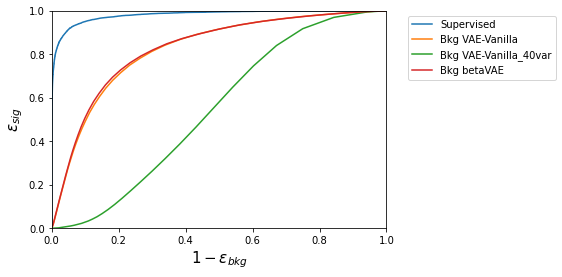

In [19]:
#plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
#plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(ref_fpr,ref_tpr,label='Supervised')
plt.plot(VAE_bkg_fpr,VAE_bkg_tpr,label='Bkg VAE-Vanilla')
plt.plot(VAE_bkg_40var_fpr,VAE_bkg_40var_tpr,label='Bkg VAE-Vanilla_40var')
plt.plot(betaVAE_bkg_fpr,betaVAE_bkg_tpr,label='Bkg betaVAE')

#plt.plot(nflow_bkg_Planar_fpr,nflow_bkg_Planar_tpr,label='Bkg NFlowVAE-Planar')
#plt.plot(z1f1_fpr,z1f1_tpr,label='Bkg NFlowVAE-z1_f1')
#plt.plot(z2f1_fpr,z2f1_tpr,label='Bkg NFlowVAE-z2_f1')
#plt.plot(z3f1_fpr,z3f1_tpr,label='Bkg NFlowVAE-z3_f1')
#plt.plot(z4f1_fpr,z4f1_tpr,label='Bkg NFlowVAE-z4_f1')
#plt.plot(z5f1_fpr,z5f1_tpr,label='Bkg NFlowVAE-z5_f1')

#plt.plot(z1f1_fpr,z1f1_tpr,label='Bkg NFlowVAE-z1_f2')
#plt.plot(z2f1_fpr,z2f1_tpr,label='Bkg NFlowVAE-z2_f2')
#plt.plot(z3f1_fpr,z3f1_tpr,label='Bkg NFlowVAE-z3_f2')
#plt.plot(z4f1_fpr,z4f1_tpr,label='Bkg NFlowVAE-z4_f2')
#plt.plot(z5f1_fpr,z5f1_tpr,label='Bkg NFlowVAE-z5_f2')

#plt.plot(z1f1_fpr,z1f1_tpr,label='Bkg NFlowVAE-z1_f3')
#plt.plot(z2f1_fpr,z2f1_tpr,label='Bkg NFlowVAE-z2_f3')
#plt.plot(z3f1_fpr,z3f1_tpr,label='Bkg NFlowVAE-z3_f3')
#plt.plot(z4f1_fpr,z4f1_tpr,label='Bkg NFlowVAE-z4_f3')
#plt.plot(z5f1_fpr,z5f1_tpr,label='Bkg NFlowVAE-z5_f3')

#plt.plot(nflow_bkg_Radial_fpr,nflow_bkg_Radial_tpr,label='Bkg NFlowVAE-Radial')
#plt.plot(maf_bkg_fpr,maf_bkg_tpr,label='Bkg MAF')



#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
#plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
#plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel(r'$1-\epsilon_{bkg}$',fontsize=15)
plt.ylabel(r'$\epsilon_{sig}$',fontsize=15)
#plt.semilogy()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.savefig('ROC_Curve_zdim_fnum.png')

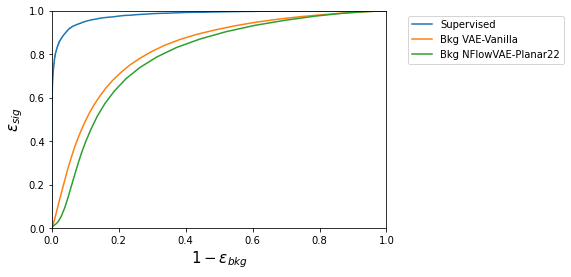

In [34]:
#plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
#plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(ref_fpr,ref_tpr,label='Supervised')
plt.plot(VAE_bkg_fpr,VAE_bkg_tpr,label='Bkg VAE-Vanilla')
#plt.plot(nflow_bkg_Planar_fpr,nflow_bkg_Planar_tpr,label='Bkg NFlowVAE-Planar')
plt.plot(nflow_bkg_Planar22_fpr,nflow_bkg_Planar22_tpr,label='Bkg NFlowVAE-Planar22')

#plt.plot(nflow_bkg_Radial_fpr,nflow_bkg_Radial_tpr,label='Bkg NFlowVAE-Radial')
#plt.plot(maf_bkg_fpr,maf_bkg_tpr,label='Bkg MAF')



#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
#plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
#plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel(r'$1-\epsilon_{bkg}$',fontsize=15)
plt.ylabel(r'$\epsilon_{sig}$',fontsize=15)
#plt.semilogy()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.savefig('ROC_Curve.png')

In [14]:
VAE_bkg_precision, VAE_bkg_recall = VAE_bkg.get_precision_recall()
betaVAE_bkg_precision, betaVAE_bkg_recall = betaVAE_bkg.get_precision_recall()

(0.0, 1.0)

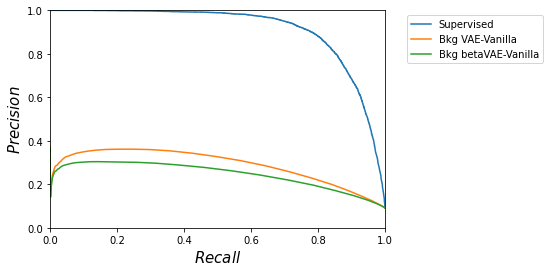

In [15]:
#plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
#plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(ref_recall,ref_precision,label='Supervised')
plt.plot(VAE_bkg_recall,VAE_bkg_precision,label='Bkg VAE-Vanilla')
plt.plot(betaVAE_bkg_recall,betaVAE_bkg_precision,label='Bkg betaVAE-Vanilla')

#plt.plot(nflow_bkg_Planar_recall,nflow_bkg_Planar_precision,label='Bkg NFlowVAE-Planar')
#plt.plot(nflow_bkg_Radial_recall,nflow_bkg_Radial_precision,label='Bkg NFlowVAE-Radial')

#plt.plot(maf_bkg_recall,maf_bkg_precision,label='Bkg MAF')

#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
#plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
#plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel('$Recall$',fontsize=15)
plt.ylabel('$Precision$',fontsize=15)
#plt.semilogy()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
#plt.savefig('PR_Curve_zdim_fnum.png')

In [23]:
VAE_bkg_precision, VAE_bkg_recall = VAE_bkg.get_precision_recall()
nflow_bkg_Planar_precision, nflow_bkg_Planar_recall = planarflow_bkg.get_precision_recall()
nflow_bkg_Radial_precision, nflow_bkg_Radial_recall = radialflow_bkg.get_precision_recall()
maf_bkg_precision, maf_bkg_recall = maf_bkg.get_precision_recall()

In [21]:
z1f1_pre, z1f1_rec = planarflow_bkg22_z1_f1.get_precision_recall()
z2f1_pre, z2f1_rec = planarflow_bkg22_z2_f1.get_precision_recall()
z3f1_pre, z3f1_rec = planarflow_bkg22_z3_f1.get_precision_recall()
z4f1_pre, z4f1_rec = planarflow_bkg22_z4_f1.get_precision_recall()
z5f1_pre, z5f1_rec = planarflow_bkg22_z5_f1.get_precision_recall()

z1f2_pre, z1f2_rec = planarflow_bkg22_z1_f2.get_precision_recall()
z2f2_pre, z2f2_rec = planarflow_bkg22_z2_f2.get_precision_recall()
z3f2_pre, z3f2_rec = planarflow_bkg22_z3_f2.get_precision_recall()
z4f2_pre, z4f2_rec = planarflow_bkg22_z4_f2.get_precision_recall()
z5f2_pre, z5f2_rec = planarflow_bkg22_z5_f2.get_precision_recall()

z1f3_pre, z1f3_rec = planarflow_bkg22_z1_f3.get_precision_recall()
z2f3_pre, z2f3_rec = planarflow_bkg22_z2_f3.get_precision_recall()
z3f3_pre, z3f3_rec = planarflow_bkg22_z3_f3.get_precision_recall()
z4f3_pre, z4f3_rec = planarflow_bkg22_z4_f3.get_precision_recall()
z5f3_pre, z5f3_rec = planarflow_bkg22_z5_f3.get_precision_recall()

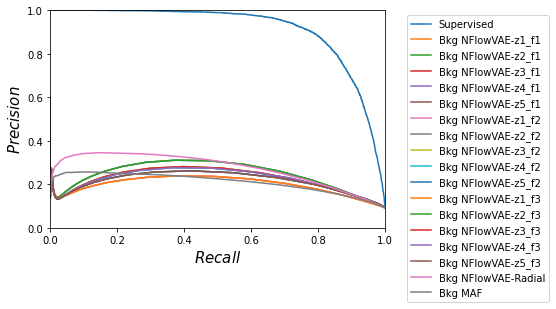

In [26]:
#plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
#plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(ref_recall,ref_precision,label='Supervised')
#plt.plot(VAE_bkg_recall,VAE_bkg_precision,label='Bkg VAE-Vanilla')
#plt.plot(nflow_bkg_Planar_recall,nflow_bkg_Planar_precision,label='Bkg NFlowVAE-Planar')
plt.plot(z1f1_rec,z1f1_pre,label='Bkg NFlowVAE-z1_f1')
plt.plot(z2f1_rec,z2f1_pre,label='Bkg NFlowVAE-z2_f1')
plt.plot(z3f1_rec,z3f1_pre,label='Bkg NFlowVAE-z3_f1')
plt.plot(z4f1_rec,z4f1_pre,label='Bkg NFlowVAE-z4_f1')
plt.plot(z5f1_rec,z5f1_pre,label='Bkg NFlowVAE-z5_f1')

plt.plot(z1f1_rec,z1f1_pre,label='Bkg NFlowVAE-z1_f2')
plt.plot(z2f1_rec,z2f1_pre,label='Bkg NFlowVAE-z2_f2')
plt.plot(z3f1_rec,z3f1_pre,label='Bkg NFlowVAE-z3_f2')
plt.plot(z4f1_rec,z4f1_pre,label='Bkg NFlowVAE-z4_f2')
plt.plot(z5f1_rec,z5f1_pre,label='Bkg NFlowVAE-z5_f2')

plt.plot(z1f1_rec,z1f1_pre,label='Bkg NFlowVAE-z1_f3')
plt.plot(z2f1_rec,z2f1_pre,label='Bkg NFlowVAE-z2_f3')
plt.plot(z3f1_rec,z3f1_pre,label='Bkg NFlowVAE-z3_f3')
plt.plot(z4f1_rec,z4f1_pre,label='Bkg NFlowVAE-z4_f3')
plt.plot(z5f1_rec,z5f1_pre,label='Bkg NFlowVAE-z5_f3')
plt.plot(nflow_bkg_Radial_recall,nflow_bkg_Radial_precision,label='Bkg NFlowVAE-Radial')

plt.plot(maf_bkg_recall,maf_bkg_precision,label='Bkg MAF')

#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
#plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
#plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel('$Recall$',fontsize=15)
plt.ylabel('$Precision$',fontsize=15)
#plt.semilogy()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.savefig('PR_Curve_zdim_fnum.png')